# **milestone 2**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import joblib

In [4]:
df=pd.read_csv('cleand_dataset.csv')
df.head()

,trans_date_trans_time,Credit_card_number,Merchant_name,Merchant_category,Transaction_amount,Gender,city,state,zip,Customer_latitude,...,Job,Date_of_birth,trans_num,Merchant_latitude,Merchant_longitude,Is_fraud,trans_year_month,city_size,city-state,trans_hour
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,28654,36.0788,...,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,36.011293,-82.048315,0,2019-01,Small,Moravian Falls-NC,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,99160,48.8878,...,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0,2019-01,Small,Orient-WA,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,83252,42.1808,...,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0,2019-01,Small,Malad City-ID,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,59632,46.2306,...,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,47.034331,-112.561071,0,2019-01,Small,Boulder-MT,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,24433,38.4207,...,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,38.674999,-78.632459,0,2019-01,Small,Doe Hill-VA,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 22 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   trans_date_trans_time     object 
 1   Credit_card_number        int64  
 2   Merchant_name             object 
 3   Merchant_category         object 
 4   Transaction_amount        float64
 5   Gender                    object 
 6   city                      object 
 7   state                     object 
 8   zip                       int64  
 9   Customer_latitude         float64
 10  Customer_longitude        float64
 11  Customer_city_population  int64  
 12  Job                       object 
 13  Date_of_birth             object 
 14  trans_num                 object 
 15  Merchant_latitude         float64
 16  Merchant_longitude        float64
 17  Is_fraud                  int64  
 18  trans_year_month          object 
 19  city_size                 object 
 20  city-state              

In [6]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

In [7]:
df['Date_of_birth'] = pd.to_datetime(df['Date_of_birth'])


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 22 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   trans_date_trans_time     datetime64[ns]
 1   Credit_card_number        int64         
 2   Merchant_name             object        
 3   Merchant_category         object        
 4   Transaction_amount        float64       
 5   Gender                    object        
 6   city                      object        
 7   state                     object        
 8   zip                       int64         
 9   Customer_latitude         float64       
 10  Customer_longitude        float64       
 11  Customer_city_population  int64         
 12  Job                       object        
 13  Date_of_birth             datetime64[ns]
 14  trans_num                 object        
 15  Merchant_latitude         float64       
 16  Merchant_longitude        float64       
 17  Is_fraud

In [9]:
df.head()

,trans_date_trans_time,Credit_card_number,Merchant_name,Merchant_category,Transaction_amount,Gender,city,state,zip,Customer_latitude,...,Job,Date_of_birth,trans_num,Merchant_latitude,Merchant_longitude,Is_fraud,trans_year_month,city_size,city-state,trans_hour
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,28654,36.0788,...,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,36.011293,-82.048315,0,2019-01,Small,Moravian Falls-NC,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,99160,48.8878,...,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0,2019-01,Small,Orient-WA,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,83252,42.1808,...,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0,2019-01,Small,Malad City-ID,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,59632,46.2306,...,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,47.034331,-112.561071,0,2019-01,Small,Boulder-MT,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,24433,38.4207,...,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,38.674999,-78.632459,0,2019-01,Small,Doe Hill-VA,0


## feature_engineering

### **Calculating Fraud Ratio Per City**

This code calculates the fraud ratio for each city and assigns it as a new feature.

```python

In [10]:
df['fraud_ratio_in_city'] = df.groupby('city')['Is_fraud'].transform('mean')

In [11]:
#cheak if the fraud_ratio_in_city is correlated with Is_fraud
df[['fraud_ratio_in_city', 'Is_fraud']].corr()

,fraud_ratio_in_city,Is_fraud
fraud_ratio_in_city,1.000000,0.274512
Is_fraud,0.274512,1.000000


In [12]:
#Split the 'trans_date_trans_time' column into two columns: date and time
df['date'] = df['trans_date_trans_time'].dt.date
df['time'] = df['trans_date_trans_time'].dt.time

#Drop the 'trans_date_trans_time' since it's been split into separate date and time columns
df.drop(columns='trans_date_trans_time', inplace=True)

df

,Credit_card_number,Merchant_name,Merchant_category,Transaction_amount,Gender,city,state,zip,Customer_latitude,Customer_longitude,...,Merchant_latitude,Merchant_longitude,Is_fraud,trans_year_month,city_size,city-state,trans_hour,fraud_ratio_in_city,date,time
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,28654,36.0788,-81.1781,...,36.011293,-82.048315,0,2019-01,Small,Moravian Falls-NC,0,0.003758,2019-01-01,00:00:18
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,99160,48.8878,-118.2105,...,49.159047,-118.186462,0,2019-01,Small,Orient-WA,0,0.002160,2019-01-01,00:00:44
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,83252,42.1808,-112.2620,...,43.150704,-112.154481,0,2019-01,Small,Malad City-ID,0,0.010884,2019-01-01,00:00:51
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,59632,46.2306,-112.1138,...,47.034331,-112.561071,0,2019-01,Small,Boulder-MT,0,0.020188,2019-01-01,00:01:16
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,24433,38.4207,-79.4629,...,38.674999,-78.632459,0,2019-01,Small,Doe Hill-VA,0,0.004449,2019-01-01,00:03:06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,M,Luray,MO,63453,40.4931,-91.8912,...,39.946837,-91.333331,0,2020-12,Small,Luray-MO,23,0.005011,2020-12-31,23:59:07
1852390,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,M,Lake Jackson,TX,77566,29.0393,-95.4401,...,29.661049,-96.186633,0,2020-12,Small,Lake Jackson-TX,23,0.004370,2020-12-31,23:59:09
1852391,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,F,Burbank,WA,99323,46.1966,-118.9017,...,46.658340,-119.715054,0,2020-12,Small,Burbank-WA,23,0.003087,2020-12-31,23:59:15
1852392,4079773899158,fraud_Breitenberg LLC,travel,7.99,M,Mesa,ID,83643,44.6255,-116.4493,...,44.470525,-117.080888,0,2020-12,Small,Mesa-ID,23,0.006826,2020-12-31,23:59:24


In [13]:
#Converting 'time' column to datetime format
#We have to convert the 'time' column to a string first before converting it to a datetime object
df['time'] = df['time'].astype(str)
df['time'] = pd.to_datetime(df['time'])

#Defining custom time bins based on hour of the day
#Bins are as follows: early morning (12am-6am), late morning (6am-12pm).\
#afternoon (12pm-4pm), evening (4pm-8pm), night (8pm-12am)
bins = [0, 6, 12, 16, 20, 24]
labels = ['early morning', 'late morning', 'afternoon', 'evening', 'night']

#Extracting hour of the day and categorize into bins
df['hour'] = df['time'].dt.hour
df['time_bins'] = pd.cut(df['hour'], bins=bins, labels=labels, right=False)

#Dropping the 'hour' column if not needed
df = df.drop(columns=['hour', 'time'])
df

C:\Users\Youssef Abdel Khaleq\AppData\Local\Temp\ipykernel_19472\1973109126.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['time'] = pd.to_datetime(df['time'])


,Credit_card_number,Merchant_name,Merchant_category,Transaction_amount,Gender,city,state,zip,Customer_latitude,Customer_longitude,...,Merchant_latitude,Merchant_longitude,Is_fraud,trans_year_month,city_size,city-state,trans_hour,fraud_ratio_in_city,date,time_bins
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,28654,36.0788,-81.1781,...,36.011293,-82.048315,0,2019-01,Small,Moravian Falls-NC,0,0.003758,2019-01-01,early morning
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,99160,48.8878,-118.2105,...,49.159047,-118.186462,0,2019-01,Small,Orient-WA,0,0.002160,2019-01-01,early morning
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,83252,42.1808,-112.2620,...,43.150704,-112.154481,0,2019-01,Small,Malad City-ID,0,0.010884,2019-01-01,early morning
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,59632,46.2306,-112.1138,...,47.034331,-112.561071,0,2019-01,Small,Boulder-MT,0,0.020188,2019-01-01,early morning
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,24433,38.4207,-79.4629,...,38.674999,-78.632459,0,2019-01,Small,Doe Hill-VA,0,0.004449,2019-01-01,early morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,M,Luray,MO,63453,40.4931,-91.8912,...,39.946837,-91.333331,0,2020-12,Small,Luray-MO,23,0.005011,2020-12-31,night
1852390,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,M,Lake Jackson,TX,77566,29.0393,-95.4401,...,29.661049,-96.186633,0,2020-12,Small,Lake Jackson-TX,23,0.004370,2020-12-31,night
1852391,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,F,Burbank,WA,99323,46.1966,-118.9017,...,46.658340,-119.715054,0,2020-12,Small,Burbank-WA,23,0.003087,2020-12-31,night
1852392,4079773899158,fraud_Breitenberg LLC,travel,7.99,M,Mesa,ID,83643,44.6255,-116.4493,...,44.470525,-117.080888,0,2020-12,Small,Mesa-ID,23,0.006826,2020-12-31,night


In [14]:
# since this data is till 2020 Dec 31, We will compute age of each customer during 2021.
df['cust_age'] = df['Date_of_birth'].dt.year.apply(lambda x: 2021-x)

# check
df['cust_age']

0          33
1          43
2          59
3          54
4          35
           ..
1852389    55
1852390    22
1852391    40
1852392    56
1852393    28
Name: cust_age, Length: 1852394, dtype: int64

In [15]:
# let's bucket the age column
df['cust_age_groups'] = df['cust_age'].apply(lambda x: 'below 10' if x<10 else ('10-20' if x>=10 and x<20 else ('20-30' if x>=20 and x<30 else('30-40' if x>=30 and x<40 else('40-50' if x>=40 and x<50 else('50-60' if x>=50 and x<60 else('60-70' if x>=60 and x<70 else ('70-80' if x>=70 and x<80 else 'Above 80'))))))))

# check
df.head()

,Credit_card_number,Merchant_name,Merchant_category,Transaction_amount,Gender,city,state,zip,Customer_latitude,Customer_longitude,...,Is_fraud,trans_year_month,city_size,city-state,trans_hour,fraud_ratio_in_city,date,time_bins,cust_age,cust_age_groups
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,28654,36.0788,-81.1781,...,0,2019-01,Small,Moravian Falls-NC,0,0.003758,2019-01-01,early morning,33,30-40
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,99160,48.8878,-118.2105,...,0,2019-01,Small,Orient-WA,0,0.002160,2019-01-01,early morning,43,40-50
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,83252,42.1808,-112.2620,...,0,2019-01,Small,Malad City-ID,0,0.010884,2019-01-01,early morning,59,50-60
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,59632,46.2306,-112.1138,...,0,2019-01,Small,Boulder-MT,0,0.020188,2019-01-01,early morning,54,50-60
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,24433,38.4207,-79.4629,...,0,2019-01,Small,Doe Hill-VA,0,0.004449,2019-01-01,early morning,35,30-40


In [16]:
# now let's see which customer age group was more prone towards the number of fraudulent transactions
age_piv = pd.pivot_table(data = df,
                         index = 'cust_age_groups',
                         columns = 'Is_fraud',
                         values = 'trans_num',
                         aggfunc = 'count')

# check
age_piv

Is_fraud,0,1
cust_age_groups,,
10-20,19662,72
20-30,240278,1299
30-40,431724,1870
40-50,419342,1642
50-60,294902,1832
60-70,211150,1373
70-80,115033,714
Above 80,110652,849


<Axes: title={'center': 'Age group vulnerability'}, xlabel='Age groups', ylabel='No. of transactions'>

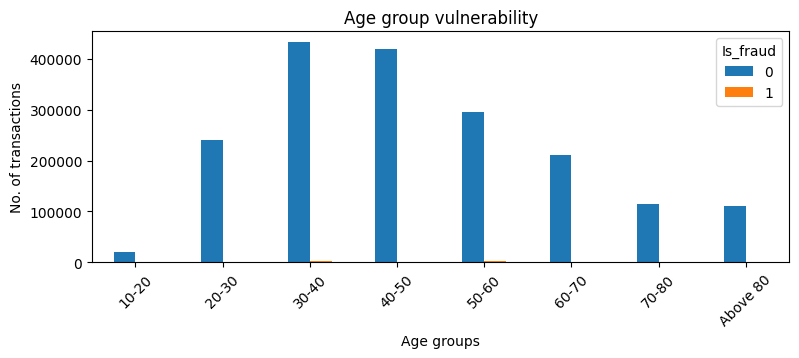

In [17]:
age_piv.plot(kind = 'bar', title = 'Age group vulnerability', xlabel = 'Age groups',ylabel = 'No. of transactions',figsize = (9,3),rot = 45 )

C:\Users\Youssef Abdel Khaleq\AppData\Local\Temp\ipykernel_19472\4168917228.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = age_piv, x = age_piv.index, y = age_piv[1].values, palette = 'husl')


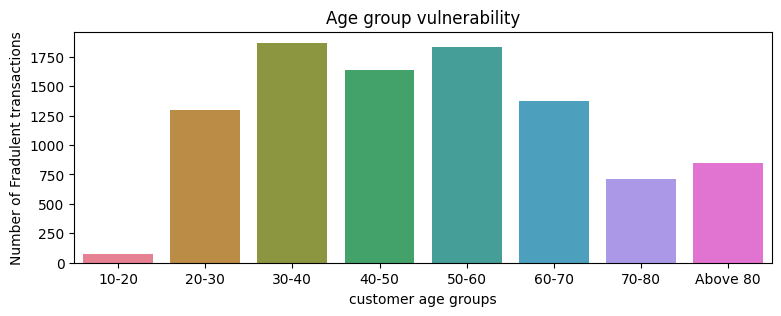

In [18]:
# let's see only fraudlent transactions 
plt.figure(figsize = (9,3))
plt.title('Age group vulnerability')
sns.barplot(data = age_piv, x = age_piv.index, y = age_piv[1].values, palette = 'husl')
plt.xlabel('customer age groups')
plt.ylabel('Number of Fradulent transactions')
plt.show()

Inferences: Customers who are in the 30-40 age group are more vulnerable to the number of fradulent transactions.

Let's find how much it costed for the bank on an average for each age group in the case of fradulent transactions.

In [19]:
age_piv_2 = pd.pivot_table(data = df,
                           index = 'cust_age_groups',
                           columns = 'Is_fraud',
                           values = 'Transaction_amount',
                           aggfunc = np.mean)

# check
age_piv_2

C:\Users\Youssef Abdel Khaleq\AppData\Local\Temp\ipykernel_19472\2122047302.py:1: FutureWarning: The provided callable <function mean at 0x000001D3CB8DBB00> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  age_piv_2 = pd.pivot_table(data = df,


Is_fraud,0,1
cust_age_groups,,
10-20,62.804052,570.907083
20-30,65.090333,547.980169
30-40,71.807532,501.161610
40-50,72.071064,458.982582
50-60,65.087352,551.289754
60-70,62.254365,571.760291
70-80,62.767527,581.812213
Above 80,63.316478,550.361013


C:\Users\Youssef Abdel Khaleq\AppData\Local\Temp\ipykernel_19472\3207374761.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = age_piv_2, x = age_piv_2.index, y = age_piv_2[1].values, palette = 'husl')


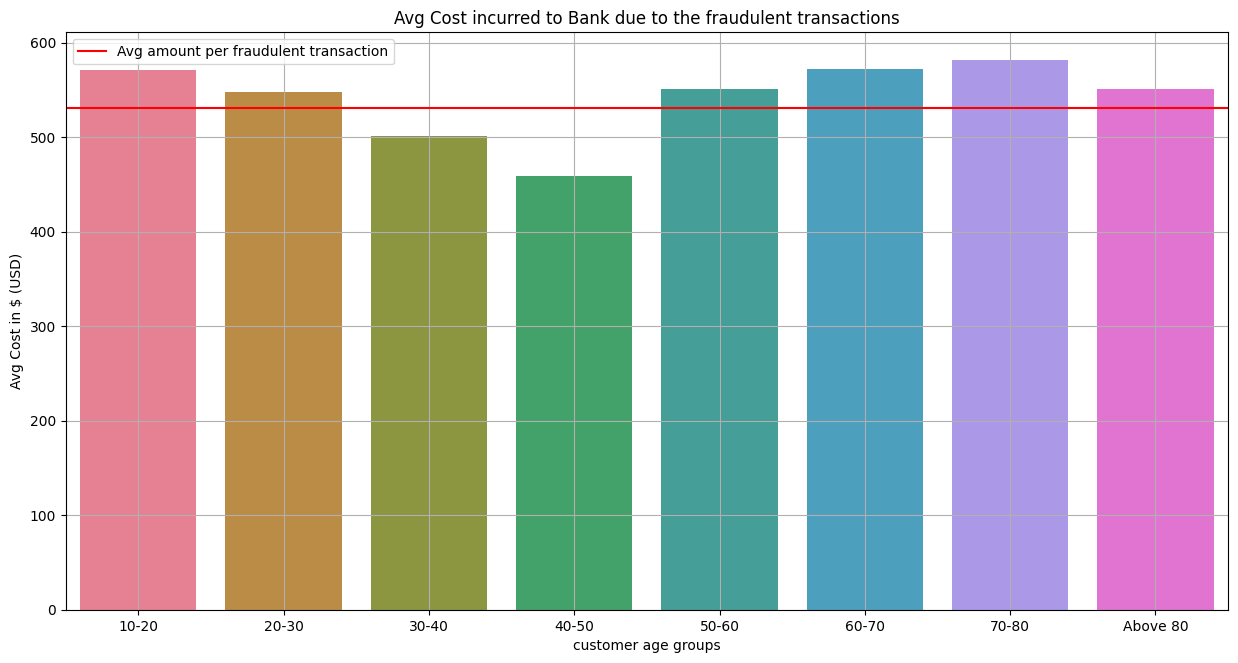

In [20]:
# let's visualize only the fraudlent transactions 
plt.figure(figsize = (15,7.5))
plt.title('Avg Cost incurred to Bank due to the fraudulent transactions')
sns.barplot(data = age_piv_2, x = age_piv_2.index, y = age_piv_2[1].values, palette = 'husl')
plt.axhline(y = 530.66, color = 'r', linestyle = '-', label = 'Avg amount per fraudulent transaction')
plt.grid()
plt.xlabel('customer age groups')
plt.ylabel('Avg Cost in $ (USD)')
plt.legend()
plt.show()

How is the geographical distance between customer location to merchant location varies with respect to the fradulent transaction amount

a=sin2(Δϕ/2)+cos(ϕ1)⋅cos(ϕ2)⋅sin2(Δλ/2)

In [21]:
# function to determine distance between two coordinates
# link to this function: - https://www.geeksforgeeks.org/program-distance-two-points-earth/
from math import radians, cos, sin, asin, sqrt
def distance(df, lat1, lat2, lon1, lon2):
     
    # The math module contains a function named
    # radians which converts from degrees to radians.
    df['lon1'] = df[lon1].apply(lambda x: radians(x))
    df['lon2'] = df[lon2].apply(lambda x: radians(x))
    df['lat1'] = df[lat1].apply(lambda x: radians(x))
    df['lat2'] = df[lat2].apply(lambda x: radians(x))
      
    # Haversine formula
    df['dlon'] = df['lon2'] - df['lon1']
    df['dlat'] = df['lat2'] - df['lat1']

    df['a'] = df['dlat'].apply(lambda x: sin(x/2)**2) + df['lat1'].apply(lambda x: cos(x))*df['lat2'].apply(lambda x: cos(x))*df['dlon'].apply(lambda x: sin(x/2)**2)
 

    df['c'] = df['a'].apply(lambda x: 2*asin(sqrt(x)))
    
    # Radius of earth in kilometers = 6371. Use 3956 for miles
    r = 3956
      
    # calculate the result
    return(df['c'] * r)

In [20]:
df.columns

Index(['Credit_card_number', 'Merchant_name', 'Merchant_category',
       'Transaction_amount', 'Gender', 'city', 'state', 'zip',
       'Customer_latitude', 'Customer_longitude', 'Customer_city_population',
       'Job', 'Date_of_birth', 'trans_num', 'Merchant_latitude',
       'Merchant_longitude', 'Is_fraud', 'trans_year_month', 'city_size',
       'city-state', 'trans_hour', 'fraud_ratio_in_city', 'date', 'time_bins',
       'cust_age', 'cust_age_groups'],
      dtype='object')

In [22]:
df['distance_bw_cust_merch_in_miles'] = distance(df,lat1 = 'Customer_latitude', lat2 = 'Merchant_latitude', lon1 = 'Customer_longitude', lon2 = 'Merchant_longitude')

# check
df['distance_bw_cust_merch_in_miles']

0          48.804266
1          18.759907
2          67.189336
3          59.407205
4          48.157978
             ...    
1852389    47.828510
1852390    62.140073
1852391    50.146570
1852392    32.868294
1852393    44.979732
Name: distance_bw_cust_merch_in_miles, Length: 1852394, dtype: float64

In [23]:
df.head()

,Credit_card_number,Merchant_name,Merchant_category,Transaction_amount,Gender,city,state,zip,Customer_latitude,Customer_longitude,...,cust_age_groups,lon1,lon2,lat1,lat2,dlon,dlat,a,c,distance_bw_cust_merch_in_miles
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,28654,36.0788,-81.1781,...,30-40,-1.416825,-1.432013,0.629694,0.628516,-0.015188,-0.001178,0.000038,0.012337,48.804266
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,99160,48.8878,-118.2105,...,40-50,-2.063162,-2.062743,0.853253,0.857987,0.000420,0.004734,0.000006,0.004742,18.759907
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,83252,42.1808,-112.2620,...,50-60,-1.959342,-1.957465,0.736194,0.753122,0.001877,0.016928,0.000072,0.016984,67.189336
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,59632,46.2306,-112.1138,...,50-60,-1.956755,-1.964561,0.806876,0.820904,-0.007806,0.014028,0.000056,0.015017,59.407205
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,24433,38.4207,-79.4629,...,30-40,-1.386889,-1.372395,0.670568,0.675006,0.014494,0.004438,0.000037,0.012173,48.157978


In [24]:
# let's bucket the distance between customer and merchant
df['distance_cust_merch'] = df['distance_bw_cust_merch_in_miles'].apply(lambda x: '< 20' if x>0 and x<=20 else('20-40' if x>20 and x<=40 else('40-60' if x>40 and x<=60 else('60-80' if x>60 and x<=80 else '> 80'))))

# check
df[['distance_bw_cust_merch_in_miles','distance_cust_merch']]

,distance_bw_cust_merch_in_miles,distance_cust_merch
0,48.804266,40-60
1,18.759907,< 20
2,67.189336,60-80
3,59.407205,40-60
4,48.157978,40-60
...,...,...
1852389,47.828510,40-60
1852390,62.140073,60-80
1852391,50.146570,40-60
1852392,32.868294,20-40


In [25]:
# let's see how w.r.t distance transaction amount varies
dis_piv = pd.pivot_table(data = df,
                         index = 'distance_cust_merch',
                         columns = 'Is_fraud',
                         values = 'Transaction_amount',
                         aggfunc = np.mean)

# check
dis_piv

C:\Users\Youssef Abdel Khaleq\AppData\Local\Temp\ipykernel_19472\479099345.py:2: FutureWarning: The provided callable <function mean at 0x000001D3CB8DBB00> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  dis_piv = pd.pivot_table(data = df,


Is_fraud,0,1
distance_cust_merch,,
20-40,67.980100,518.545797
40-60,67.466160,536.074159
60-80,67.490977,529.616239
< 20,67.798937,544.268404
> 80,68.601749,540.452455


C:\Users\Youssef Abdel Khaleq\AppData\Local\Temp\ipykernel_19472\379279006.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = dis_piv, x = dis_piv.index, y = dis_piv[1], palette = 'pastel')


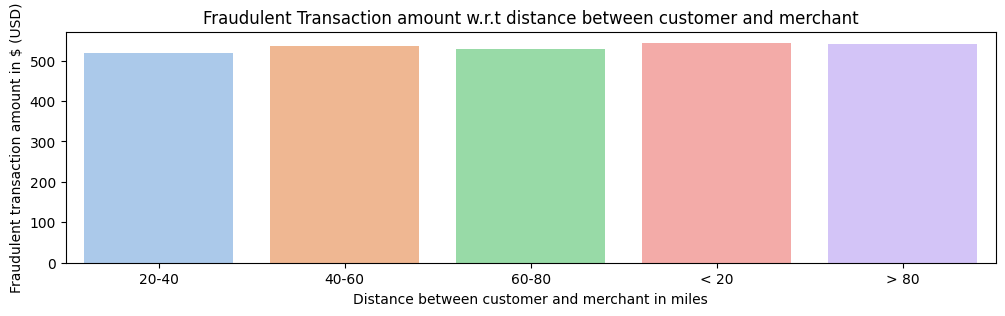

In [26]:
# now let's see how fraudulent transaction amount varies w.r.t. the distance between customer and merchant location
plt.figure(figsize = (12,3))
plt.title('Fraudulent Transaction amount w.r.t distance between customer and merchant')
sns.barplot(data = dis_piv, x = dis_piv.index, y = dis_piv[1], palette = 'pastel')
plt.xlabel('Distance between customer and merchant in miles')
plt.ylabel('Fraudulent transaction amount in $ (USD)')
plt.show()

Inferences: High average cost incurred to bank is from those customers who are just less than 20 miles away from their merchants. But still we are unable to identify the specific pattern w.r.t distance.

In [27]:
# Compute the average transaction amount for each credit card
df['avg_amount_per_card'] = df.groupby('Credit_card_number')['Transaction_amount'].transform('mean')
#Calculating the ratio of transaction amount to average amount per card
df['amount_to_avg_ratio'] = df['Transaction_amount'] / df['avg_amount_per_card']

In [28]:
df['time_bins'].unique()

['early morning', 'late morning', 'afternoon', 'evening', 'night']
Categories (5, object): ['early morning' < 'late morning' < 'afternoon' < 'evening' < 'night']

# For model building, let's remove all the redundant columns from the dataframe


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 38 columns):
 #   Column                           Dtype         
---  ------                           -----         
 0   Credit_card_number               int64         
 1   Merchant_name                    object        
 2   Merchant_category                object        
 3   Transaction_amount               float64       
 4   Gender                           object        
 5   city                             object        
 6   state                            object        
 7   zip                              int64         
 8   Customer_latitude                float64       
 9   Customer_longitude               float64       
 10  Customer_city_population         int64         
 11  Job                              object        
 12  Date_of_birth                    datetime64[ns]
 13  trans_num                        object        
 14  Merchant_latitude                f

In [30]:
df.columns

Index(['Credit_card_number', 'Merchant_name', 'Merchant_category',
       'Transaction_amount', 'Gender', 'city', 'state', 'zip',
       'Customer_latitude', 'Customer_longitude', 'Customer_city_population',
       'Job', 'Date_of_birth', 'trans_num', 'Merchant_latitude',
       'Merchant_longitude', 'Is_fraud', 'trans_year_month', 'city_size',
       'city-state', 'trans_hour', 'fraud_ratio_in_city', 'date', 'time_bins',
       'cust_age', 'cust_age_groups', 'lon1', 'lon2', 'lat1', 'lat2', 'dlon',
       'dlat', 'a', 'c', 'distance_bw_cust_merch_in_miles',
       'distance_cust_merch', 'avg_amount_per_card', 'amount_to_avg_ratio'],
      dtype='object')

In [31]:
# columns to be dropped, except trans_num, which we will be dealing further
drop_col = ['Credit_card_number', 'Merchant_name', 'city', 'state', 'Customer_latitude',
       'Customer_longitude','Date_of_birth', 'Merchant_latitude',
       'Merchant_longitude', 'trans_year_month', 'cust_age','Customer_city_population',
       'city-state', 'lon1', 'lon2', 'lat1', 'lat2', 'dlon',
       'dlat', 'a', 'c', 'distance_bw_cust_merch_in_miles',
       'distance_cust_merch']

# dropping above columns from the dataframe
df.drop(drop_col, axis = 1, inplace = True)

# check
df.head()

,Merchant_category,Transaction_amount,Gender,zip,Job,trans_num,Is_fraud,city_size,trans_hour,fraud_ratio_in_city,date,time_bins,cust_age_groups,avg_amount_per_card,amount_to_avg_ratio
0,misc_net,4.97,F,28654,"Psychologist, counselling",0b242abb623afc578575680df30655b9,0,Small,0,0.003758,2019-01-01,early morning,30-40,89.408743,0.055587
1,grocery_pos,107.23,F,99160,Special educational needs teacher,1f76529f8574734946361c461b024d99,0,Small,0,0.002160,2019-01-01,early morning,40-50,56.078113,1.912154
2,entertainment,220.11,M,83252,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95,0,Small,0,0.010884,2019-01-01,early morning,50-60,69.924272,3.147834
3,gas_transport,45.00,M,59632,Patent attorney,6b849c168bdad6f867558c3793159a81,0,Small,0,0.020188,2019-01-01,early morning,50-60,80.090040,0.561868
4,misc_pos,41.96,M,24433,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46,0,Small,0,0.004449,2019-01-01,early morning,30-40,95.341146,0.440104


In [32]:
drop_col = ['avg_amount_per_card', 'date']

# dropping above columns from the dataframe
df.drop(drop_col, axis = 1, inplace = True)

# check
df.head()

,Merchant_category,Transaction_amount,Gender,zip,Job,trans_num,Is_fraud,city_size,trans_hour,fraud_ratio_in_city,time_bins,cust_age_groups,amount_to_avg_ratio
0,misc_net,4.97,F,28654,"Psychologist, counselling",0b242abb623afc578575680df30655b9,0,Small,0,0.003758,early morning,30-40,0.055587
1,grocery_pos,107.23,F,99160,Special educational needs teacher,1f76529f8574734946361c461b024d99,0,Small,0,0.002160,early morning,40-50,1.912154
2,entertainment,220.11,M,83252,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95,0,Small,0,0.010884,early morning,50-60,3.147834
3,gas_transport,45.00,M,59632,Patent attorney,6b849c168bdad6f867558c3793159a81,0,Small,0,0.020188,early morning,50-60,0.561868
4,misc_pos,41.96,M,24433,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46,0,Small,0,0.004449,early morning,30-40,0.440104


In [33]:
#make sure the target variable is the last column and the rest of the columns are features
df = df[[col for col in df.columns if col != 'Is_fraud'] + ['Is_fraud']]
df

,Merchant_category,Transaction_amount,Gender,zip,Job,trans_num,city_size,trans_hour,fraud_ratio_in_city,time_bins,cust_age_groups,amount_to_avg_ratio,Is_fraud
0,misc_net,4.97,F,28654,"Psychologist, counselling",0b242abb623afc578575680df30655b9,Small,0,0.003758,early morning,30-40,0.055587,0
1,grocery_pos,107.23,F,99160,Special educational needs teacher,1f76529f8574734946361c461b024d99,Small,0,0.002160,early morning,40-50,1.912154,0
2,entertainment,220.11,M,83252,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95,Small,0,0.010884,early morning,50-60,3.147834,0
3,gas_transport,45.00,M,59632,Patent attorney,6b849c168bdad6f867558c3793159a81,Small,0,0.020188,early morning,50-60,0.561868,0
4,misc_pos,41.96,M,24433,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46,Small,0,0.004449,early morning,30-40,0.440104,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,health_fitness,43.77,M,63453,Town planner,9b1f753c79894c9f4b71f04581835ada,Small,23,0.005011,night,50-60,0.702028,0
1852390,kids_pets,111.84,M,77566,Futures trader,2090647dac2c89a1d86c514c427f5b91,Small,23,0.004370,night,20-30,2.216748,0
1852391,kids_pets,86.88,F,99323,Musician,6c5b7c8add471975aa0fec023b2e8408,Small,23,0.003087,night,40-50,0.979434,0
1852392,travel,7.99,M,83643,Cartographer,14392d723bb7737606b2700ac791b7aa,Small,23,0.006826,night,50-60,0.130988,0


# **features selection**

```
Filter methods
Correlation Matrix with Heatmap

```

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 13 columns):
 #   Column               Dtype   
---  ------               -----   
 0   Merchant_category    object  
 1   Transaction_amount   float64 
 2   Gender               object  
 3   zip                  int64   
 4   Job                  object  
 5   trans_num            object  
 6   city_size            object  
 7   trans_hour           int64   
 8   fraud_ratio_in_city  float64 
 9   time_bins            category
 10  cust_age_groups      object  
 11  amount_to_avg_ratio  float64 
 12  Is_fraud             int64   
dtypes: category(1), float64(3), int64(3), object(6)
memory usage: 171.4+ MB


In [35]:
le_gender = LabelEncoder()
le_city_size = LabelEncoder()
le_merchant_category = LabelEncoder()
le_Job = LabelEncoder()
le_cust_age_groups = LabelEncoder()
le_time_bins = LabelEncoder()
df['Gender'] = le_gender.fit_transform(df['Gender'])
df['city_size'] = le_city_size.fit_transform(df['city_size'])
df['Merchant_category'] = le_merchant_category.fit_transform(df['Merchant_category'])
df['Job'] = le_Job.fit_transform(df['Job'])
df['time_bins'] = le_time_bins.fit_transform(df['time_bins'])
df['cust_age_groups'] = le_cust_age_groups.fit_transform(df['cust_age_groups'])

In [36]:
le_trans_num = LabelEncoder()
df['trans_num'] = le_trans_num.fit_transform(df['trans_num'])

In [37]:
joblib.dump(le_gender, 'encoders/le_gender.pkl')
joblib.dump(le_merchant_category, 'encoders/le_merchant_category.pkl')
joblib.dump(le_Job, 'encoders/le_Job.pkl')
joblib.dump(le_time_bins, 'encoders/le_time_bins.pkl')
joblib.dump(le_cust_age_groups, 'encoders/le_cust_age_groups.pkl')

['encoders/le_cust_age_groups.pkl']

In [38]:
joblib.dump(le_trans_num, 'encoders/le_trans_num.pkl')

['encoders/le_trans_num.pkl']

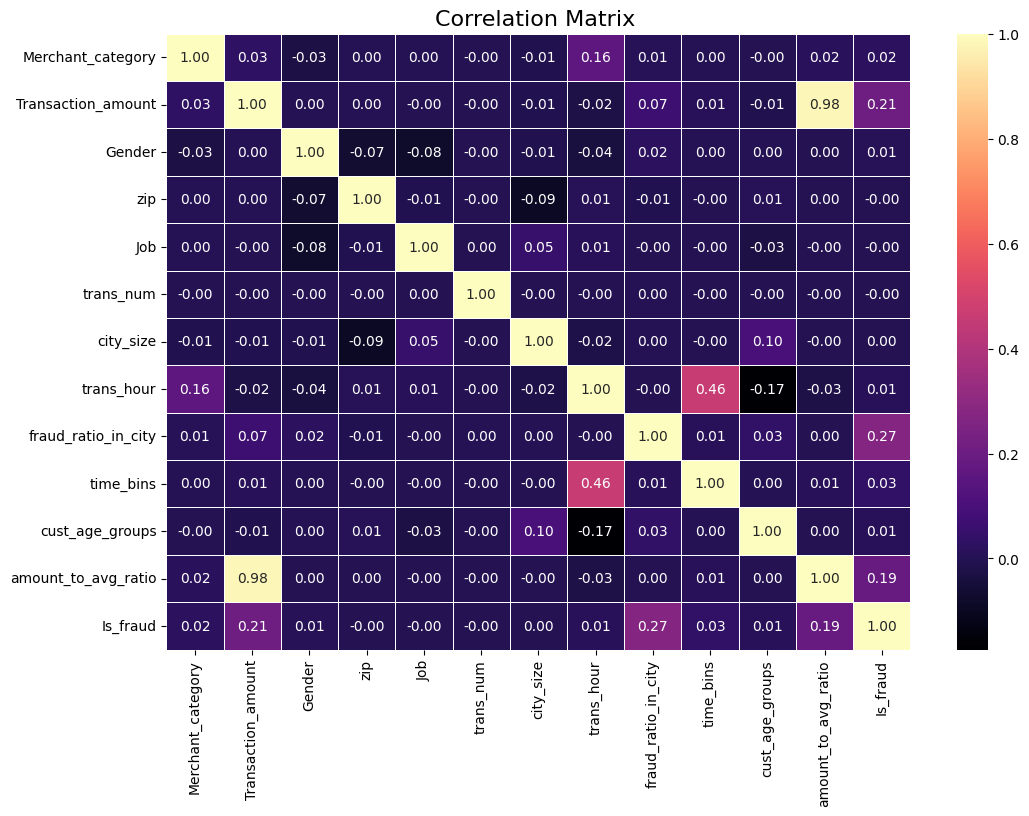

In [39]:
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="magma", linewidths=0.5)
plt.title("Correlation Matrix ", fontsize=16)
plt.show()

# 🧠 Correlation Matrix Insights

Just reviewed the correlation matrix, and here are the key takeaways:

- **Top fraud indicators:**  
  `fraud_ratio_in_city` (0.27), `Transaction_amount` (0.21), and `amount_to_avg_ratio` (0.19) are the strongest indicators of fraud. This means fraud is more likely when the transaction amount is high or significantly different from the user’s typical spending, especially in cities with historically higher fraud rates.

- **Spending habits matter:**  
  Features like `trans_hour` (0.03) and `time_bins` (0.03) have very weak positive correlation but might still contribute slightly when combined with other variables.

- **Demographics don’t tell much:**  
  Variables like `Gender`, `zip`, `Job`, and `cust_age_groups` have very low or nearly zero correlation with fraud, suggesting they aren’t strong predictors by themselves.

- **Interesting geographic effects:**  
  While `city_size` shows nearly no correlation with fraud (0.00), it does slightly correlate with `trans_hour` and `cust_age_groups`, indicating potential behavioral or regional patterns rather than direct fraud risk.

- **Nothing too extreme:**  
  The overall correlations are relatively low, indicating fraud is likely influenced by a mix of smaller signals rather than any single strong factor.


# 2nd method Fischer score

### Fisher Score

**Fisher Score** is a feature selection method used in classification problems. The goal of using **Fisher Score** is to identify the features that best distinguish between different classes (e.g., fraudulent vs non-fraudulent transactions in a credit card fraud detection project).

### **How Fisher Score is Calculated**

Fisher Score is calculated by comparing the **variance between classes** (inter-class variance) and the **variance within each class** (intra-class variance) for each feature. The formula for Fisher Score is:

\[
F_j = \frac{\sum_{c} N_c (\mu_{j,c} - \mu_j)^2}{\sum_{c} N_c \sigma_{j,c}^2}
\]

Where:
- **\( F_j \)** = Fisher Score for feature **\( j \)**
- **\( N_c \)** = Number of samples in class **\( c \)**
- **\( \mu_{j,c} \)** = Mean of feature **\( j \)** in class **\( c \)**
- **\( \mu_j \)** = Mean of feature **\( j \)** across all data
- **\( \sigma_{j,c}^2 \)** = Variance of feature **\( j \)** in class **\( c \)**

### **Interpreting the Fisher Score Results**
- A **higher Fisher Score** indicates that the feature has a **strong ability to distinguish between the classes** (e.g., fraudulent vs non-fraudulent).
- A **lower Fisher Score** means that the feature has **less significance** in differentiating the classes.


### **Benefits of Fisher Score**
- Fisher Score is simple and effective for **identifying important features**.
- It is computationally efficient, making it suitable for large datasets.

### **Conclusion**
Fisher Score is a useful tool for **feature selection** in classification problems, allowing you to identify the most important features that contribute to differentiating between classes.


In [40]:
from sklearn.feature_selection import SelectKBest, f_classif

In [41]:
X = df.drop(columns=['Is_fraud'])  # Features
y = df['Is_fraud']  # Target variable

In [42]:
# Assume X contains features and y contains labels (0 = non-fraud, 1 = fraud)
# Use SelectKBest with Fisher Score (f_classif)
num_features = 10  # Select top 10 features
selector = SelectKBest(score_func=f_classif, k=num_features)
X_selected = selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("Top Features Selected by Fisher Score:", selected_features)

Top Features Selected by Fisher Score: Index(['Merchant_category', 'Transaction_amount', 'Gender', 'zip', 'Job',
       'trans_hour', 'fraud_ratio_in_city', 'time_bins', 'cust_age_groups',
       'amount_to_avg_ratio'],
      dtype='object')


# 🧠 Feature Selection using Fisher Score (ANOVA F-value)
```
This Python script uses Fisher Score (also known as ANOVA F-value) to evaluate the importance of features in a classification problem.
It helps in identifying which features are most relevant for predicting the target variable.

```

In [43]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif

#Fisher Score (f_classif)
selector = SelectKBest(score_func=f_classif, k='all') 
X_selected = selector.fit_transform(X, y)

fisher_scores = selector.scores_

# data frame with feature names and their corresponding Fisher scores
fisher_df = pd.DataFrame({
    'Feature': X.columns,
    'Fisher Score': fisher_scores
})

#Fisher Score
fisher_df = fisher_df.sort_values(by='Fisher Score', ascending=False)

# Display the table of features ranked by their Fisher Scores
print(fisher_df)


                Feature   Fisher Score
8   fraud_ratio_in_city  150967.231091
1    Transaction_amount   84871.058540
11  amount_to_avg_ratio   67443.106678
9             time_bins    2132.308205
0     Merchant_category     688.716670
7            trans_hour     322.613564
10      cust_age_groups     246.248529
2                Gender      63.256114
3                   zip       8.887254
4                   Job       3.566768
6             city_size       0.094827
5             trans_num       0.038965


### **Feature Importance using Random Forest**

This code trains a `RandomForestClassifier` model and extracts feature importance scores.

```python

In [44]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

In [45]:
model = RandomForestClassifier()
model.fit(X, y)

importances = model.feature_importances_
features = X.columns

# Sort features by importance
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

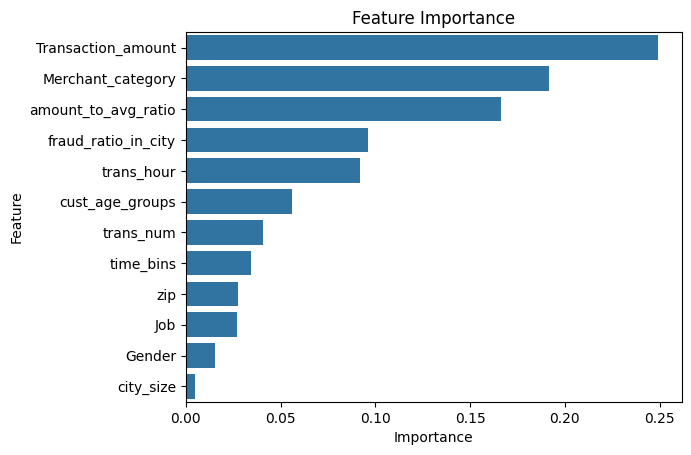

In [46]:
# Plot feature importance
sns.barplot(x=feature_importance_df.Importance, y=feature_importance_df.Feature)
plt.title("Feature Importance")
plt.show()

## After applying Fisher Score, Feature Importance using Random Forest, and correlation analysis via Heatmap,
## we selected the following features as the most relevant for our model:
## ['Merchant_category', 'Transaction_amount', 'zip', 'Trans_hour', 'Gender',
##  'fraud_ratio_in_city', 'time_bins', 'Job', 'amount_to_avg_ratio',cuts_age_groubs]

In [47]:
#make sure the target variable is the last column and the rest of the columns are features
df = df[[col for col in df.columns if col != 'Is_fraud'] + ['Is_fraud']]
df

,Merchant_category,Transaction_amount,Gender,zip,Job,trans_num,city_size,trans_hour,fraud_ratio_in_city,time_bins,cust_age_groups,amount_to_avg_ratio,Is_fraud
0,8,4.97,0,28654,372,80326,2,0,0.003758,1,2,0.055587,0
1,4,107.23,0,99160,431,227462,2,0,0.002160,1,3,1.912154,0
2,0,220.11,1,83252,308,1169030,2,0,0.010884,1,4,3.147834,0
3,2,45.00,1,59632,330,777909,2,0,0.020188,1,4,0.561868,0
4,9,41.96,1,24433,116,1186866,2,0,0.004449,1,2,0.440104,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,5,43.77,1,63453,477,1122239,2,23,0.005011,4,4,0.702028,0
1852390,7,111.84,1,77566,207,235369,2,23,0.004370,4,1,2.216748,0
1852391,7,86.88,0,99323,307,783898,2,23,0.003087,4,3,0.979434,0
1852392,13,7.99,1,83643,63,145946,2,23,0.006826,4,4,0.130988,0


In [48]:
df.columns

Index(['Merchant_category', 'Transaction_amount', 'Gender', 'zip', 'Job',
       'trans_num', 'city_size', 'trans_hour', 'fraud_ratio_in_city',
       'time_bins', 'cust_age_groups', 'amount_to_avg_ratio', 'Is_fraud'],
      dtype='object')

In [49]:
# put the selected features into a new dataframe
selected_df=df.drop(columns=['city_size','time_bins','fraud_ratio_in_city'])

In [50]:
print("✅ Final Selected Features after Fisher Score, Random Forest Importance, and Heatmap Analysis:")
print(['Merchant_category', 'Transaction_amount', 'Gender', 'zip', 'Job','trans_hour',
       'cust_age_groups', 'amount_to_avg_ratio'])

✅ Final Selected Features after Fisher Score, Random Forest Importance, and Heatmap Analysis:
['Merchant_category', 'Transaction_amount', 'Gender', 'zip', 'Job', 'trans_hour', 'cust_age_groups', 'amount_to_avg_ratio']


In [51]:
selected_df.head()

,Merchant_category,Transaction_amount,Gender,zip,Job,trans_num,trans_hour,cust_age_groups,amount_to_avg_ratio,Is_fraud
0,8,4.97,0,28654,372,80326,0,2,0.055587,0
1,4,107.23,0,99160,431,227462,0,3,1.912154,0
2,0,220.11,1,83252,308,1169030,0,4,3.147834,0
3,2,45.00,1,59632,330,777909,0,4,0.561868,0
4,9,41.96,1,24433,116,1186866,0,2,0.440104,0


In [52]:
selected_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 10 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Merchant_category    int64  
 1   Transaction_amount   float64
 2   Gender               int64  
 3   zip                  int64  
 4   Job                  int64  
 5   trans_num            int64  
 6   trans_hour           int64  
 7   cust_age_groups      int64  
 8   amount_to_avg_ratio  float64
 9   Is_fraud             int64  
dtypes: float64(2), int64(8)
memory usage: 141.3 MB


In [53]:
selected_df['Gender'] = le_gender.inverse_transform(selected_df['Gender'])
selected_df['Merchant_category'] = le_merchant_category.inverse_transform(selected_df['Merchant_category'])
selected_df['Job'] = le_Job.inverse_transform(selected_df['Job'])
selected_df['trans_num'] = le_trans_num.inverse_transform(selected_df['trans_num'])
selected_df['cust_age_groups'] = le_cust_age_groups.inverse_transform(selected_df['cust_age_groups'])

In [54]:
df.head()

,Merchant_category,Transaction_amount,Gender,zip,Job,trans_num,city_size,trans_hour,fraud_ratio_in_city,time_bins,cust_age_groups,amount_to_avg_ratio,Is_fraud
0,8,4.97,0,28654,372,80326,2,0,0.003758,1,2,0.055587,0
1,4,107.23,0,99160,431,227462,2,0,0.002160,1,3,1.912154,0
2,0,220.11,1,83252,308,1169030,2,0,0.010884,1,4,3.147834,0
3,2,45.00,1,59632,330,777909,2,0,0.020188,1,4,0.561868,0
4,9,41.96,1,24433,116,1186866,2,0,0.004449,1,2,0.440104,0


In [55]:
selected_df.head()

,Merchant_category,Transaction_amount,Gender,zip,Job,trans_num,trans_hour,cust_age_groups,amount_to_avg_ratio,Is_fraud
0,misc_net,4.97,F,28654,"Psychologist, counselling",0b242abb623afc578575680df30655b9,0,30-40,0.055587,0
1,grocery_pos,107.23,F,99160,Special educational needs teacher,1f76529f8574734946361c461b024d99,0,40-50,1.912154,0
2,entertainment,220.11,M,83252,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95,0,50-60,3.147834,0
3,gas_transport,45.00,M,59632,Patent attorney,6b849c168bdad6f867558c3793159a81,0,50-60,0.561868,0
4,misc_pos,41.96,M,24433,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46,0,30-40,0.440104,0


In [56]:
# save the selected features to a new CSV file
selected_df.to_csv('selected_df.csv', index=False)